## About

[Stacked area chart](/stacked-area-plot) is a graphical representation of data that shows the composition of a variable over time. The area between the x-axis and the lines is **filled** with colors to represent **different categories** of data.

The following example shows the **evolution of natural disasters** over the years by type of disaster.

This chart has been created by [Joseph Barbier](https://barbierjoseph.com). Thanks to him for accepting sharing its work here!

As a teaser, here is the plot we’re gonna try building:

![stacked area chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-stacked-area-with-inflexion-arrows.png?raw=true)


## Libraries

First, we need to install the following libraries:

- [matplotlib](/matplotlib): for plot customization
- [seaborn](/seaborn): for creating the plot
- [pandas](/pandas): for data manipulation
- [highlight_text](/advanced-custom-annotations-matplotlib): for annotations
- [pypalettes](/color-palette-finder): for the colors of the plot
- [pyfonts](/pyfonts): for the fonts
- [drawarrow](/drawarrow): for the arrows with an inflection point


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_palette
from highlight_text import fig_text, ax_text
from pyfonts import load_google_font
from drawarrow import ax_arrow

## Dataset

The type of data needed when creating a [stacked area chart](/stacked-area-plot) is a **time series**.

Specifically, our dataset needs a column for the **time variable** (usually the x-axis) and a column for each **category** we want to represent (usually the y-axis). In this case, we have one column per disaster type.


In [3]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/disaster-events.csv"
df = pd.read_csv(url)


def remove_agg_rows(entity: str):
    if entity.lower().startswith("all disasters"):
        return False
    else:
        return True


df = df.replace("Dry mass movement", "Drought")
df = df[df["Entity"].apply(remove_agg_rows)]
df = df[~df["Entity"].isin(["Fog", "Glacial lake outburst flood"])]
df = df.pivot_table(index="Entity", columns="Year", values="Disasters").T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df[df.index <= 2023]
df = df.interpolate(axis=1)
df.head()

Entity,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,
1960,1.0,8.0,14.0,20.0,8.0,1.0,2.0,2.0
1961,1.0,3.0,1.0,14.0,9.0,5.5,2.0,2.0
1962,1.0,4.0,1.0,13.0,8.0,5.0,2.0,2.0
1963,1.0,3.0,2.0,21.0,8.0,3.0,2.0,2.0
1964,8.0,7.0,14.5,22.0,22.0,1.0,1.0,1.0


## Simple stacked area

This first version of the plot is made via the `ax.stackplot()` function from [matplotlib](/matplotlib). It is the **simplest way** to create a [stacked area chart](/stacked-area-plot)


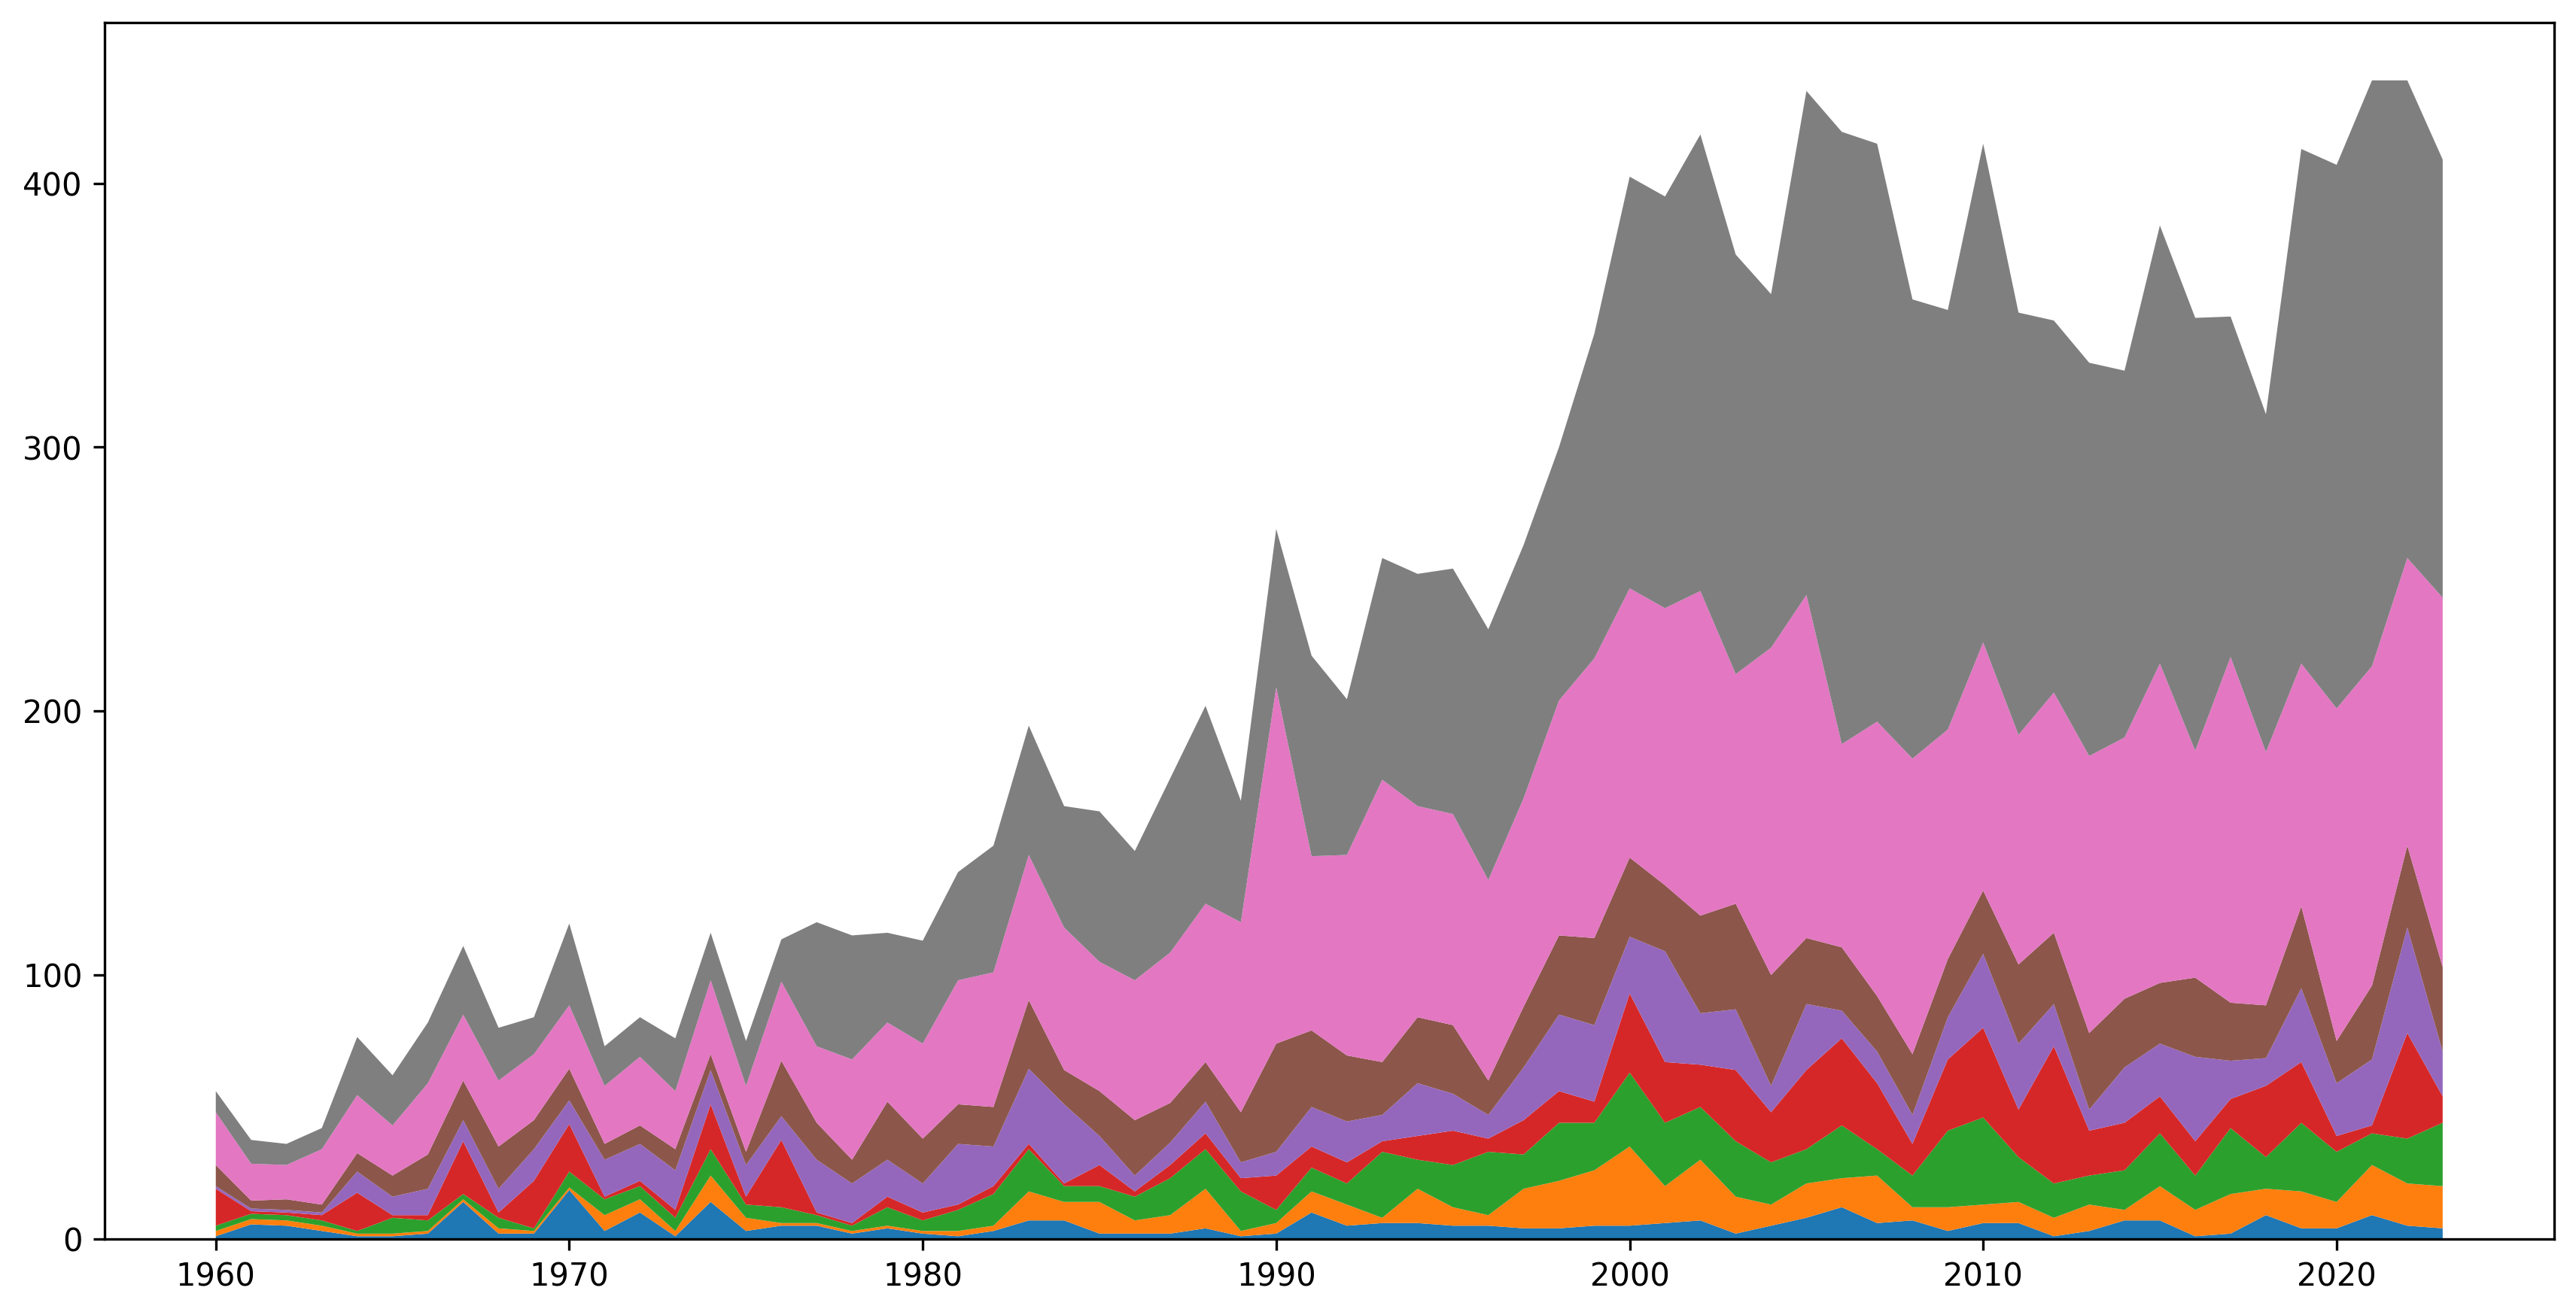

In [4]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# display the plot
plt.show()

## Custom axes

Since default axes are not very attractive, we start by **removing them** with the `ax.set_axis_off()` function.

The x and y labels will be displayed using the [highlight_text](/advanced-custom-annotations-matplotlib) package, which **simplifies** the process of adding text annotations to a plot.

In practice, we use `for` loops to **add the labels** to the plot with the desired values.


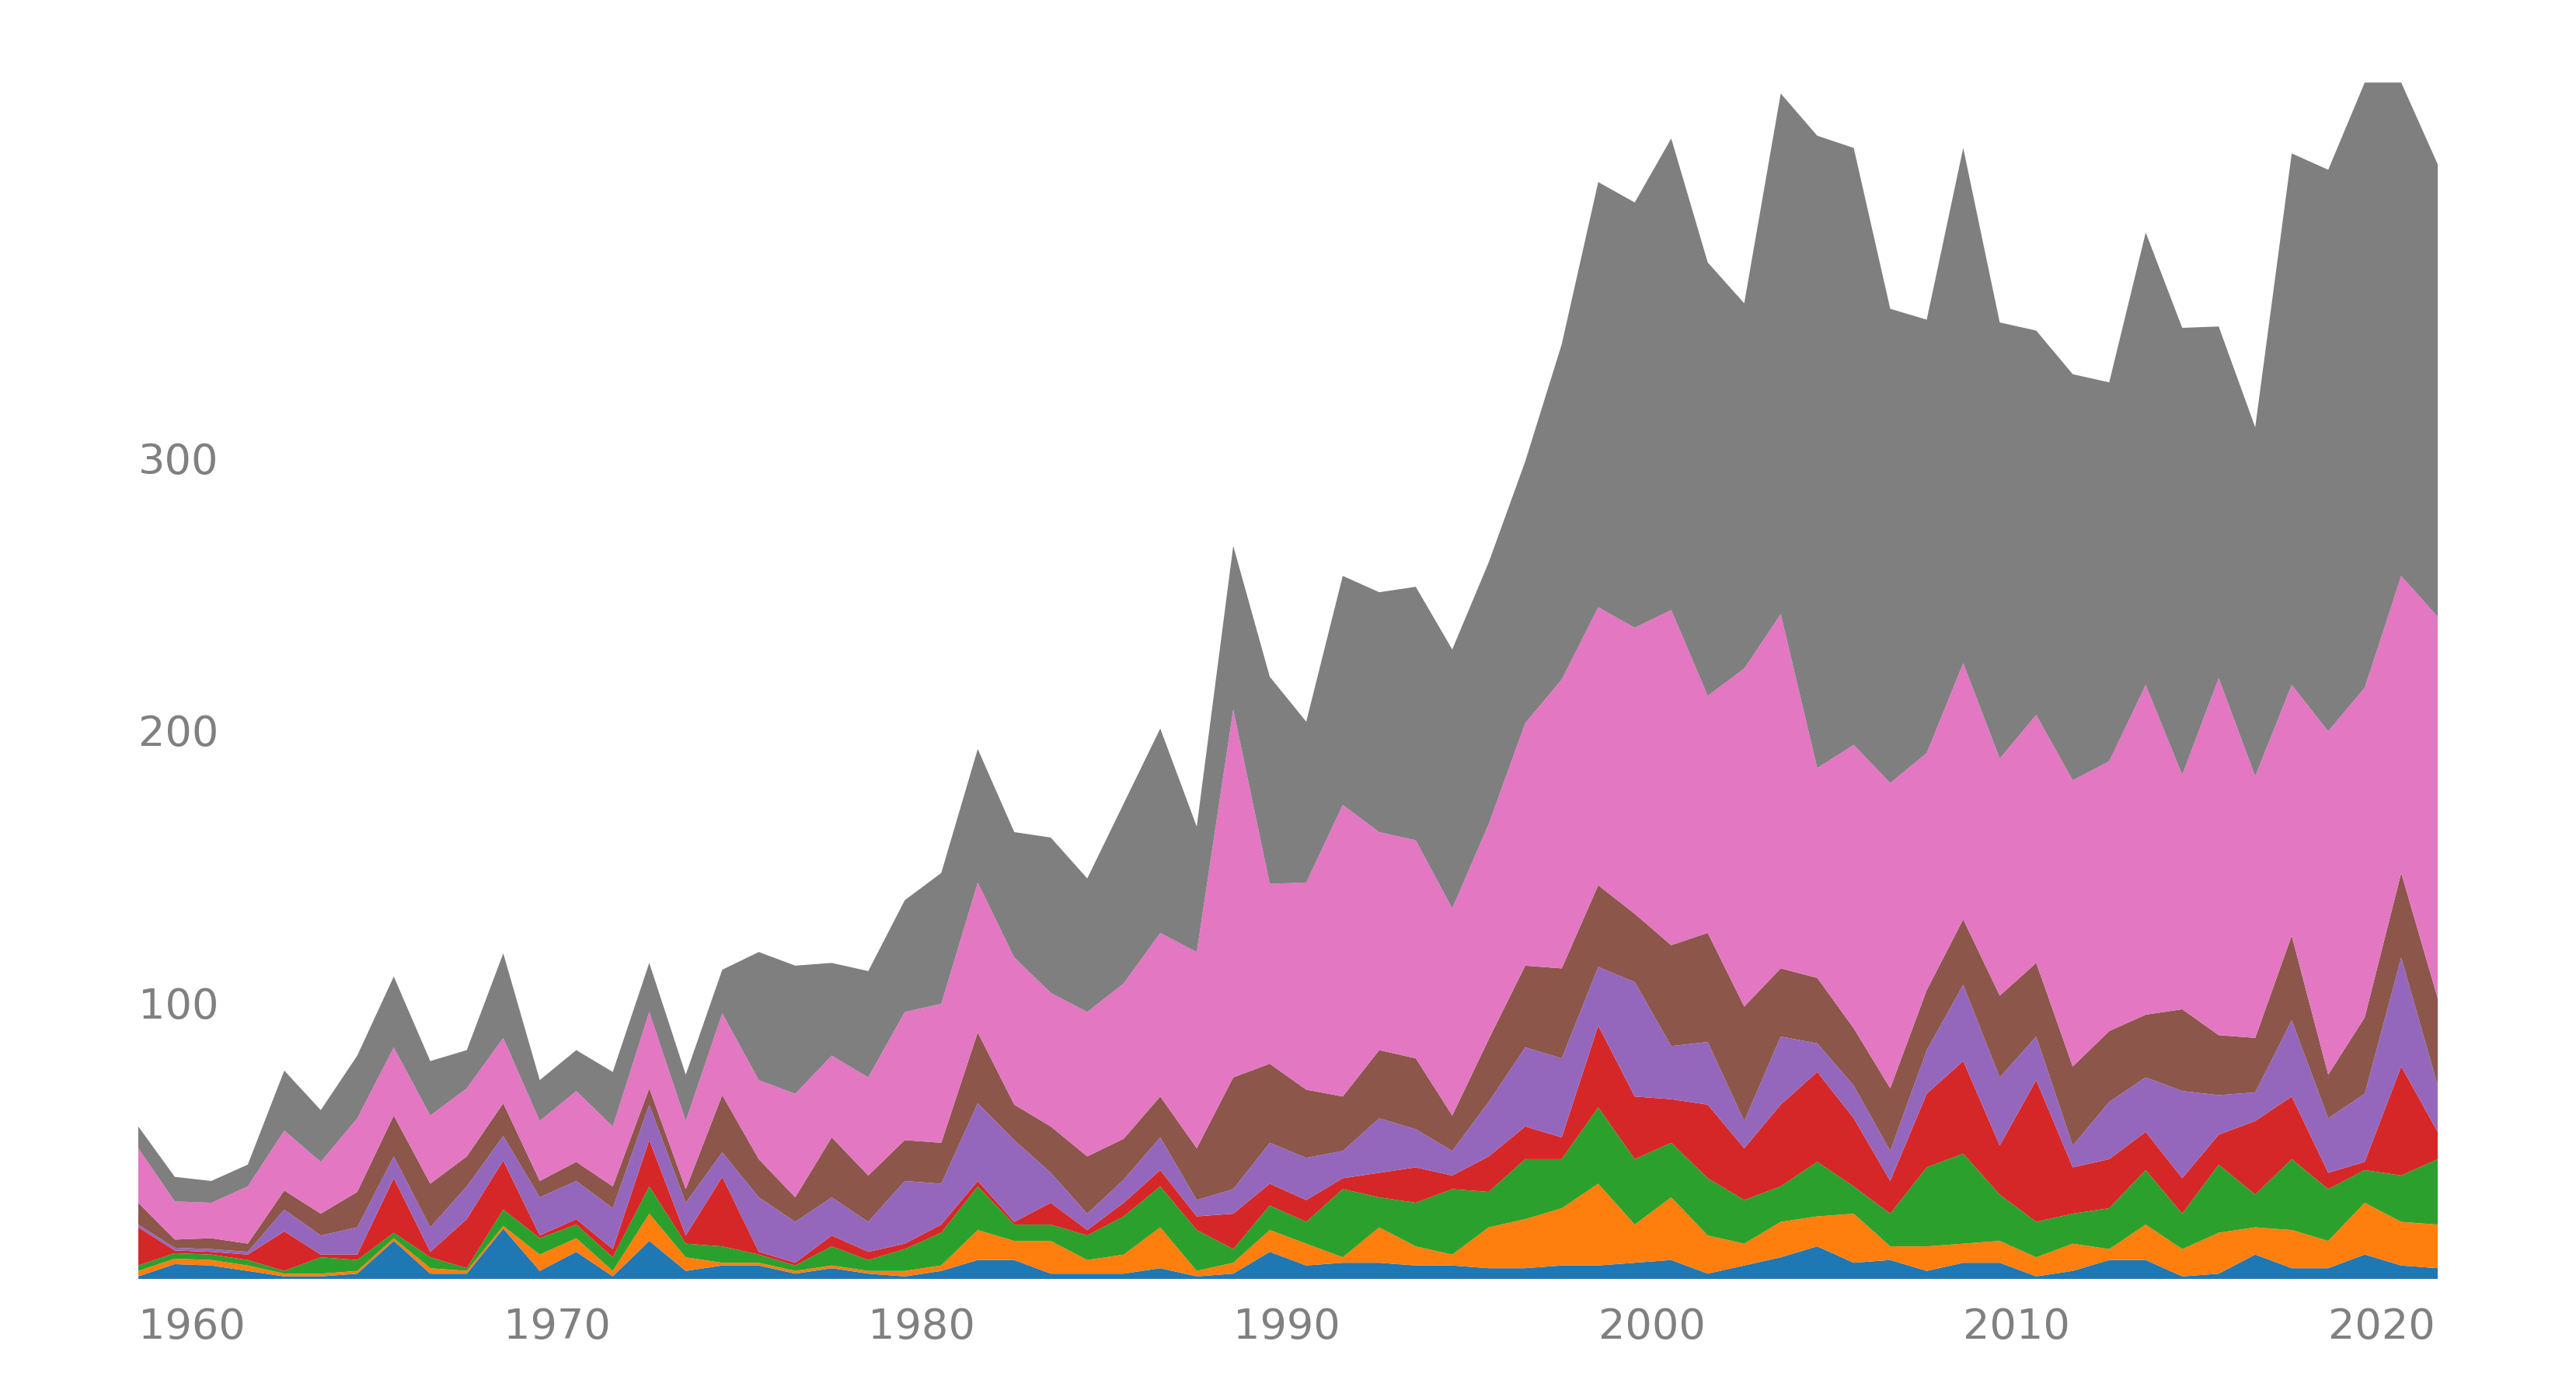

In [5]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# add label for the x-axis
for year in range(1960, 2030, 10):
    ax_text(x=year, y=-10, s=f"{year}", va="top", ha="left", fontsize=13, color="grey")

# add label for the y-axis
for value in range(100, 400, 100):
    ax_text(
        x=1960, y=value, s=f"{value}", va="center", ha="left", fontsize=13, color="grey"
    )

# display the plot
plt.show()

## Custom the colors

The palette used is from the [pypalettes](/introduction-to-pypalettes) library. We use its `load_cmap()` function to get a list of colors (in hexadecimal format) that we will use to fill the areas.

We add an additional step to manually define a **mapping between colors and the columns**. For example, we want natural disasters related to **floods to be blue**, and those about **volcanoes to be red**, etc. _Unfortunately_, there is no magic way to do this other than manually defining a **dictionary** (named `color_mapping` in this case).

Then, we simply specify the `colors` parameter of the `ax.stackplot()` function with the list of colors we want to use.


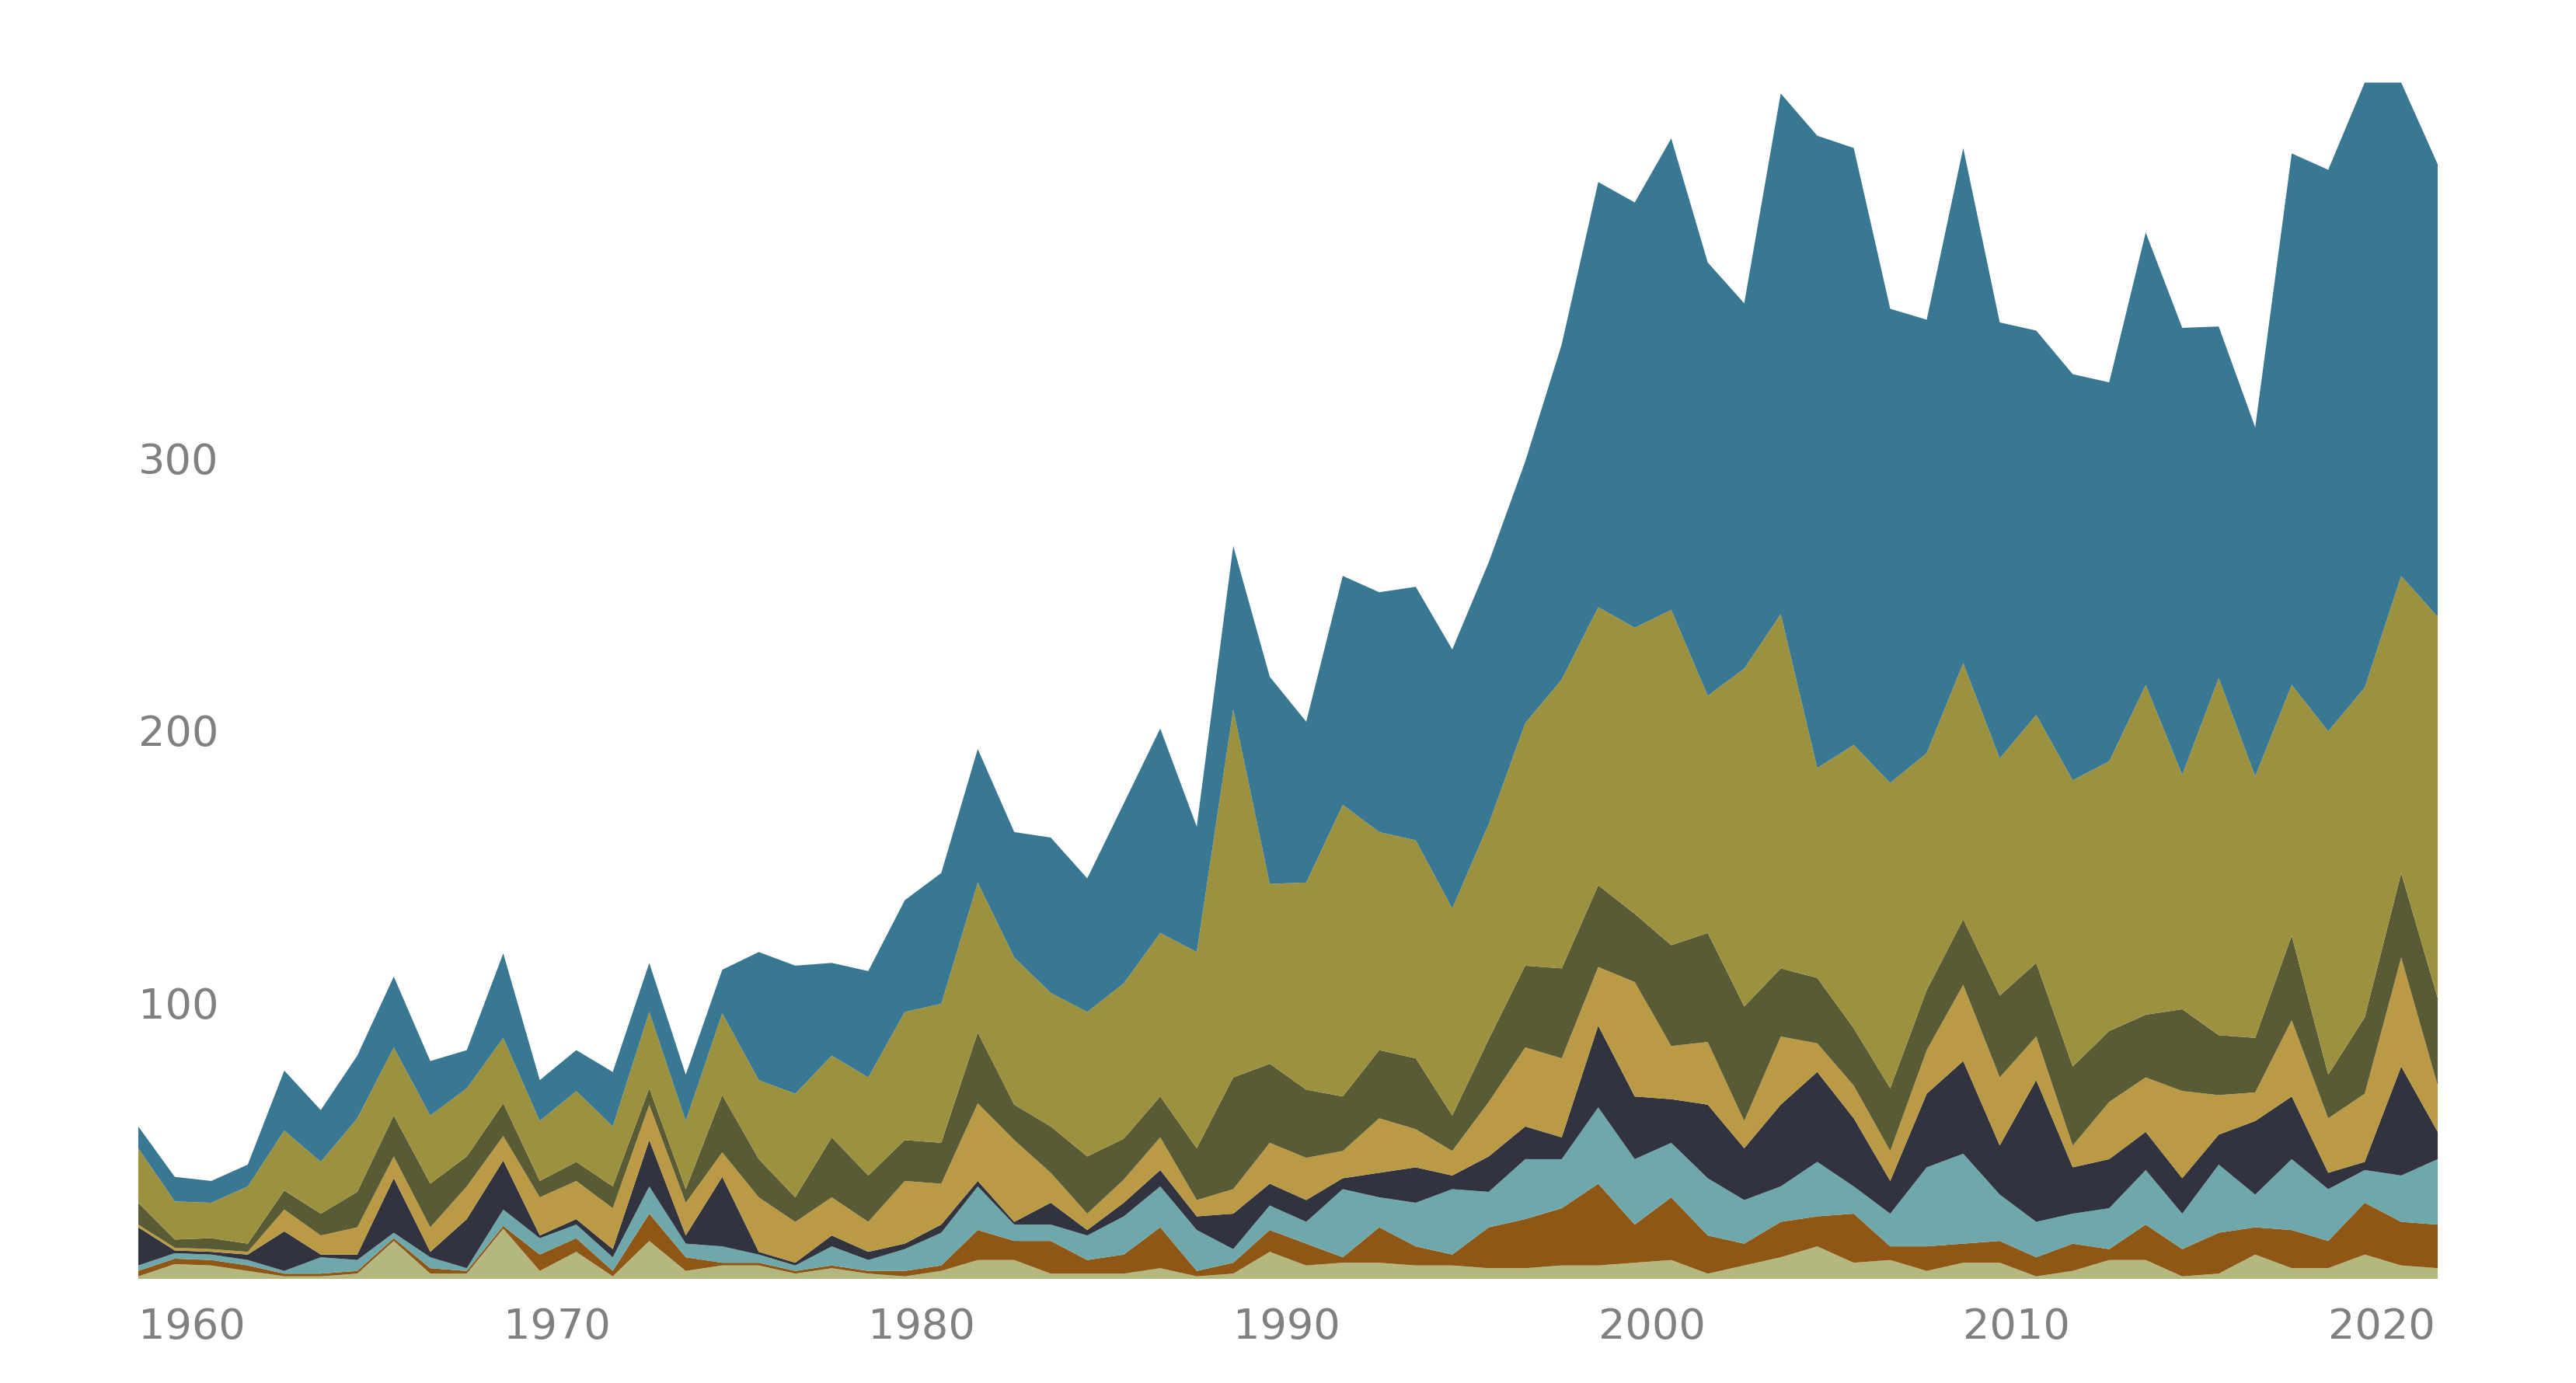

In [ ]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = load_palette("Dali")
color_mapping = {
    "Flood": colors[4],
    "Volcanic activity": colors[0],
    "Wildfire": colors[6],
    "Drought": colors[7],
    "Extreme temperature": colors[5],
    "Wet mass movement": colors[3],
    "Earthquake": colors[2],
    "Extreme weather": colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
    ax_text(x=year, y=-10, s=f"{year}", va="top", ha="left", fontsize=13, color="grey")

# add label for the y-axis
for value in range(100, 400, 100):
    ax_text(
        x=1960, y=value, s=f"{value}", va="center", ha="left", fontsize=13, color="grey"
    )

# display the plot
plt.show()

## Add title and source with custom fonts

The next step is to **add a title and a source** to the plot. We use the [highlight_text](/advanced-custom-annotations-matplotlib) package to achieve this because it allows for different **text styling within the same string**.

However, before doing this, we **load 2 custom fonts** thanks to [pyfonts](/pyfonts) to ensure a **better-looking title and source**.

Finally, we use the `fig_text()` function from the [highlight_text](/advanced-custom-annotations-matplotlib) package to add the **title and source** to the plot.


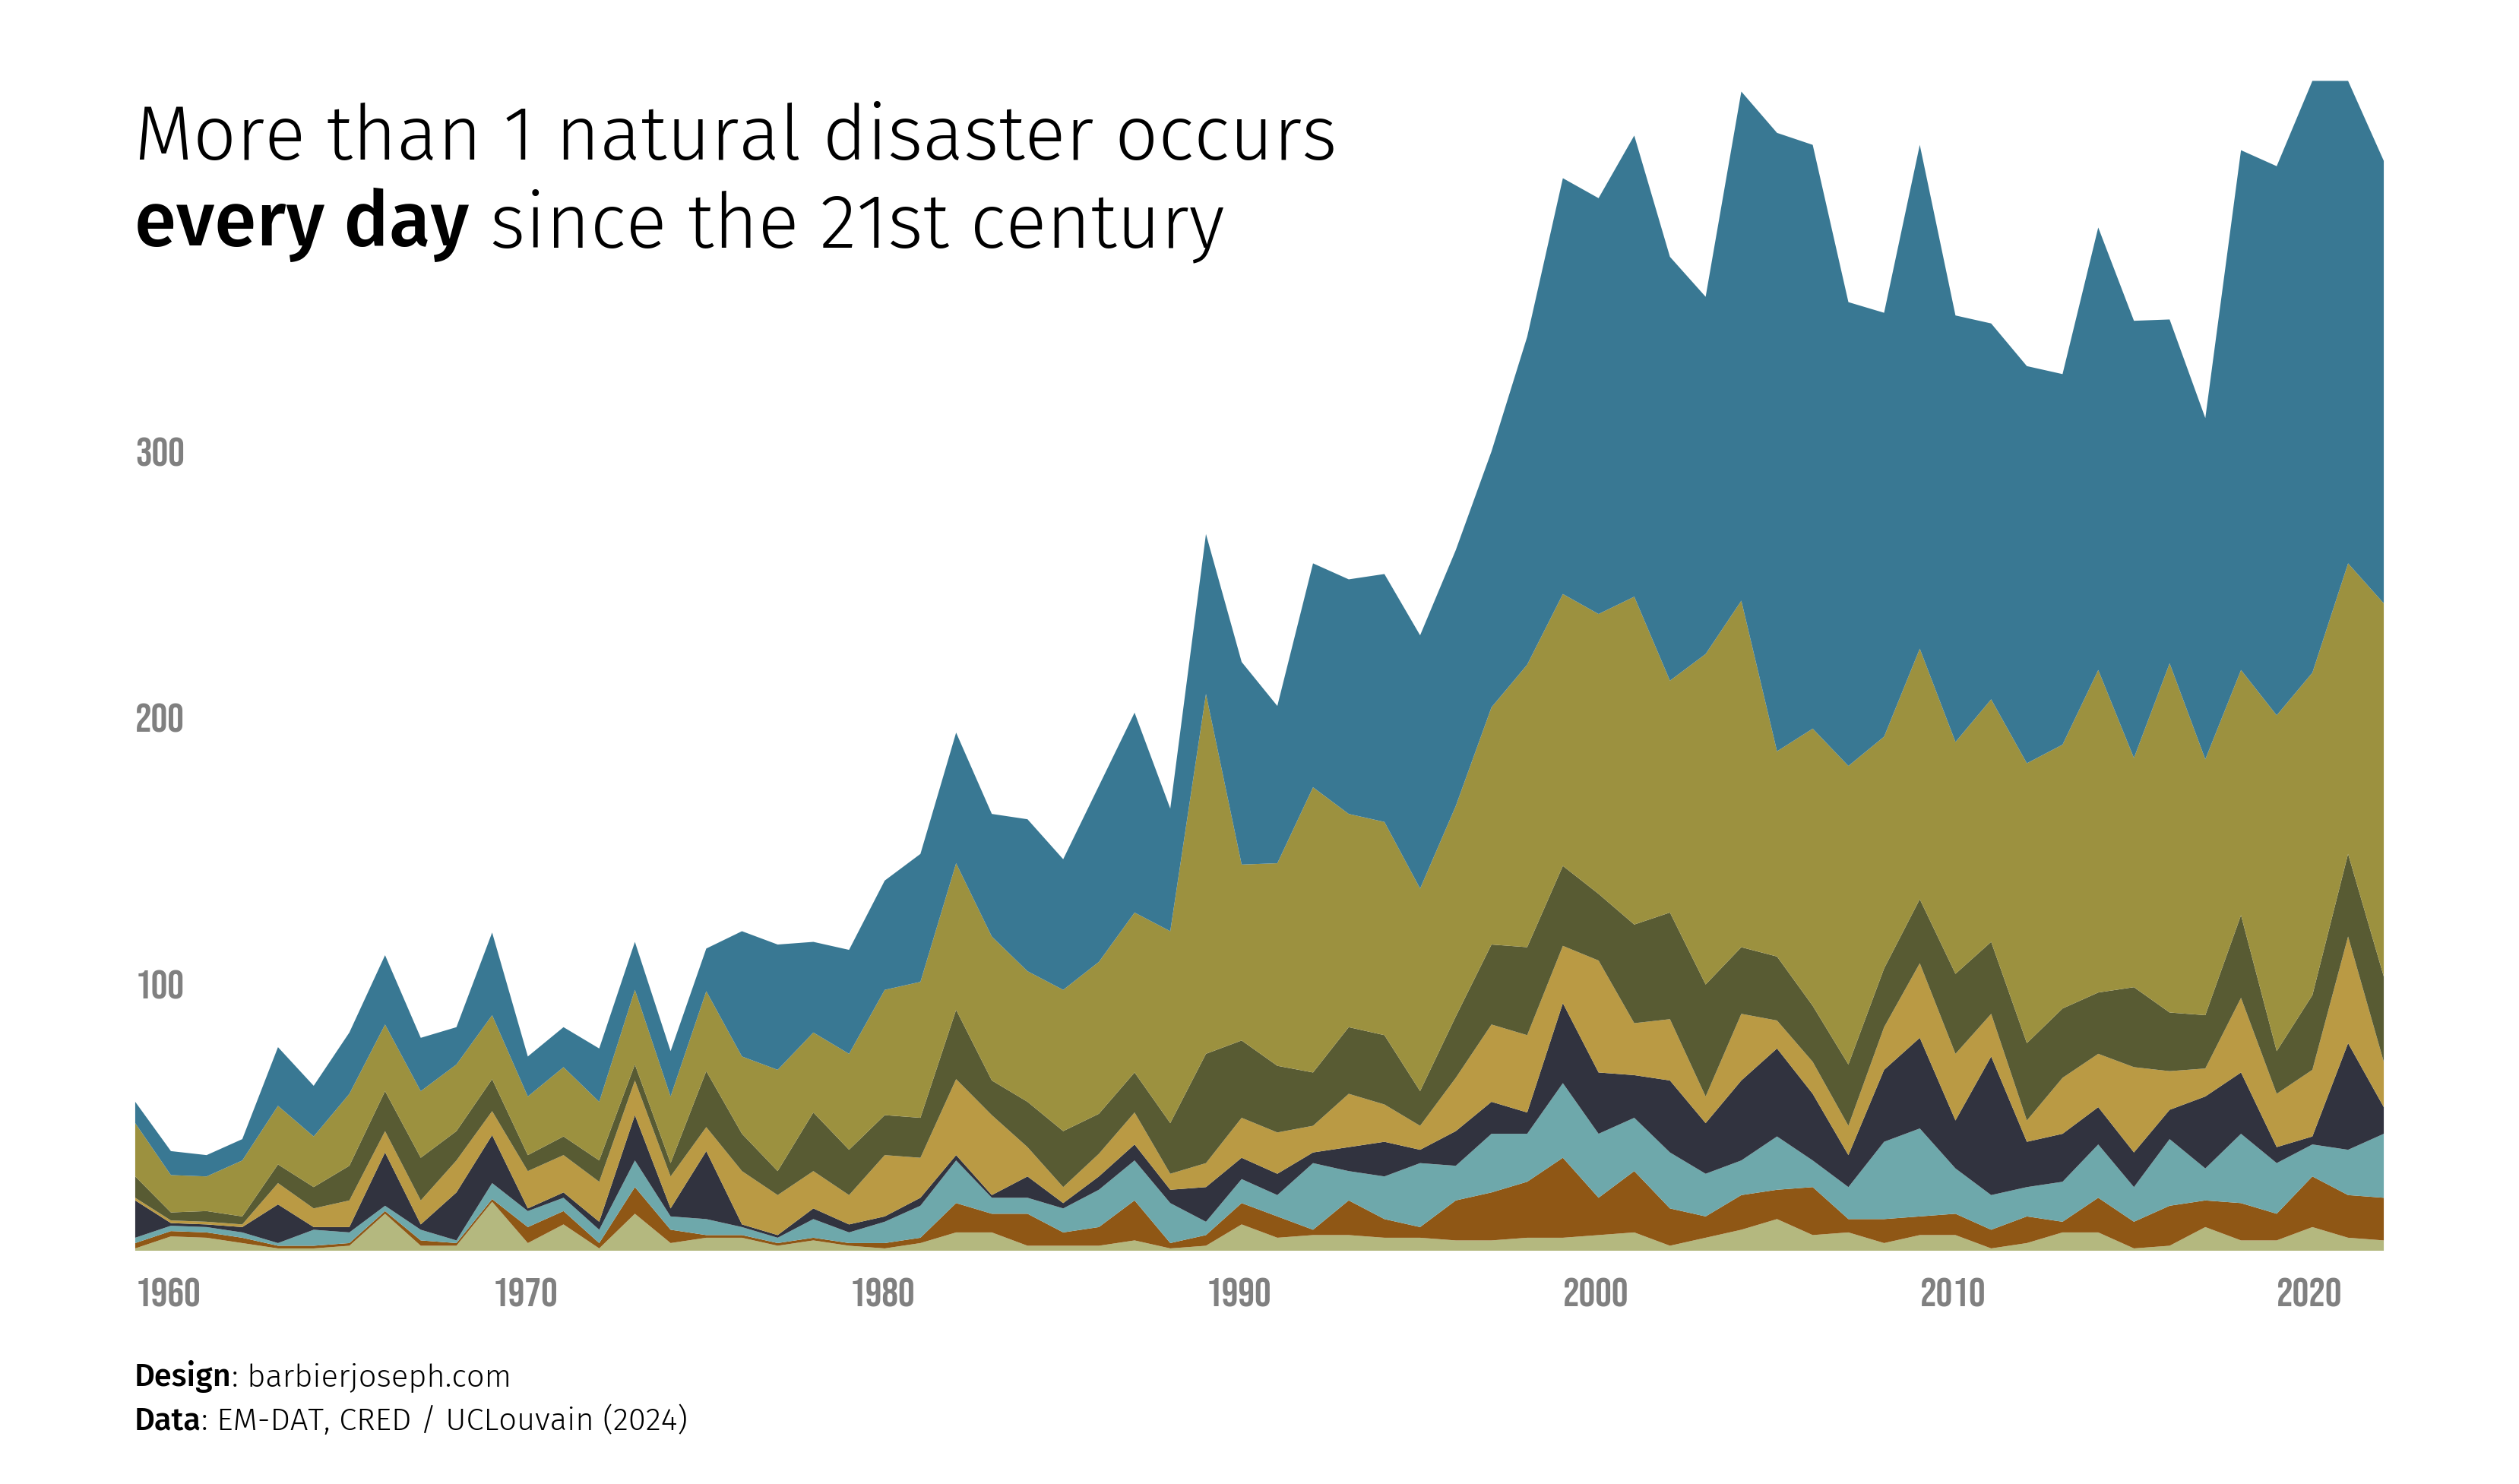

In [ ]:
# set up the font properties
font = load_google_font("Bebas Neue")
other_font = load_google_font("Fira Sans", weight="light")
other_bold_font = load_google_font("Fira Sans", weight="medium")

# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = load_palette("Dali")
color_mapping = {
    "Flood": colors[4],
    "Volcanic activity": colors[0],
    "Wildfire": colors[6],
    "Drought": colors[7],
    "Extreme temperature": colors[5],
    "Wet mass movement": colors[3],
    "Earthquake": colors[2],
    "Extreme weather": colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
    ax_text(
        x=year,
        y=-10,
        s=f"{year}",
        va="top",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )

# add label for the y-axis
for value in range(100, 400, 100):
    ax_text(
        x=1960,
        y=value,
        s=f"{value}",
        va="center",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )

# add title
fig_text(
    s="More than 1 natural disaster occurs\n<every day> since the 21st century",
    x=0.16,
    y=0.83,
    fontsize=24,
    ha="left",
    va="top",
    color="black",
    font=other_font,
    fig=fig,
    highlight_textprops=[{"font": other_bold_font}],
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
    s=text,
    x=0.16,
    y=0.05,
    fontsize=10,
    ha="left",
    va="top",
    color="black",
    fontproperties=other_font,
    highlight_textprops=[{"font": other_bold_font}, {"font": other_bold_font}],
)

# display the plot
plt.show()

## Reference lines and inline labels

Instead of using the **default matplotlib legend** (called with `ax.legend()`), we add **inline labels** to the right of the chart that have the same colors as the areas. We use the [highlight_text](/advanced-custom-annotations-matplotlib) package to achieve this.

As before, finding the **position of the labels** requires **trial and error**.


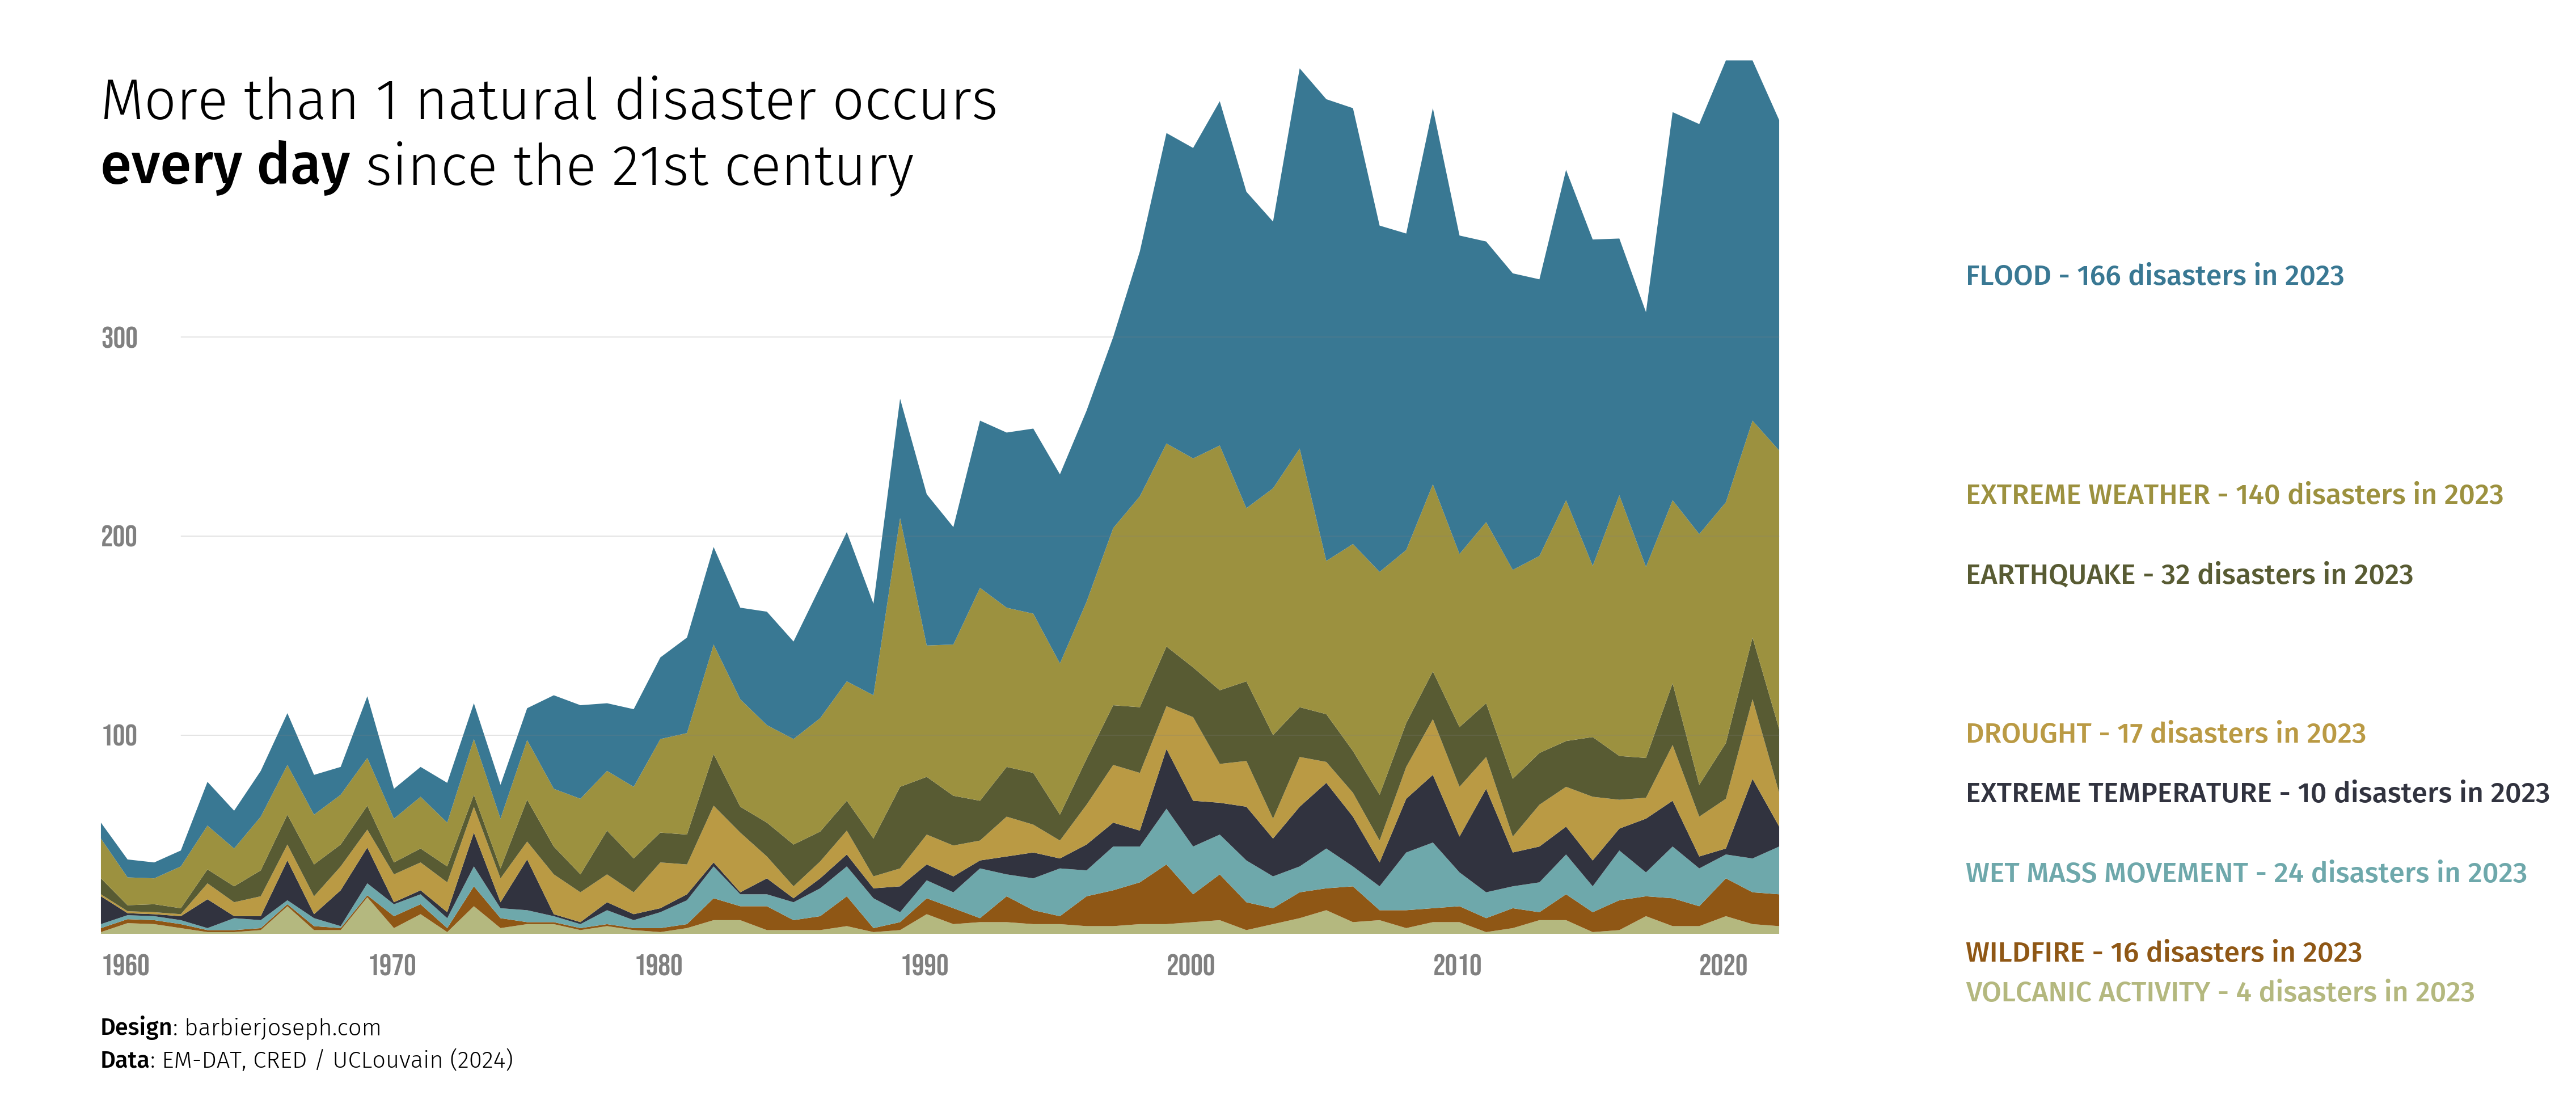

In [ ]:
# set up the font properties
font = load_google_font("Bebas Neue")
other_font = load_google_font("Fira Sans", weight="light")
other_bold_font = load_google_font("Fira Sans", weight="medium")

# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = load_palette("Dali")
color_mapping = {
    "Flood": colors[4],
    "Volcanic activity": colors[0],
    "Wildfire": colors[6],
    "Drought": colors[7],
    "Extreme temperature": colors[5],
    "Wet mass movement": colors[3],
    "Earthquake": colors[2],
    "Extreme weather": colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
    ax_text(
        x=year,
        y=-10,
        s=f"{year}",
        va="top",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )

# add label for the y-axis
for value in range(100, 400, 100):
    ax_text(
        x=1960,
        y=value,
        s=f"{value}",
        va="center",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )
    ax.plot([1963, 2023], [value, value], color="grey", lw=0.1)

# add title
fig_text(
    s="More than 1 natural disaster occurs\n<every day> since the 21st century",
    x=0.16,
    y=0.83,
    fontsize=24,
    ha="left",
    va="top",
    color="black",
    font=other_font,
    fig=fig,
    highlight_textprops=[{"font": other_bold_font}],
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
    s=text,
    x=0.16,
    y=0.05,
    fontsize=10,
    ha="left",
    va="top",
    color="black",
    fontproperties=other_font,
    highlight_textprops=[{"font": other_bold_font}, {"font": other_bold_font}],
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
    country = columns[::-1][i]
    val_2023 = int(df.loc[2023, country])
    ax_text(
        x=2030,
        y=y_pos[i],
        s=f"{country.upper()} - {val_2023} disasters in 2023",
        va="center",
        ha="left",
        font=other_bold_font,
        fontsize=12,
        color=colors[7 - i],
    )

# display the plot
plt.show()

## Arrows with inflexion points

And finally, we add **arrows to the plot** that point to the **inflexion points**. This method effectively highlights **which areas** correspond to **which disasters**. This is possible thanks to the [drawarrow library](/drawarrow).


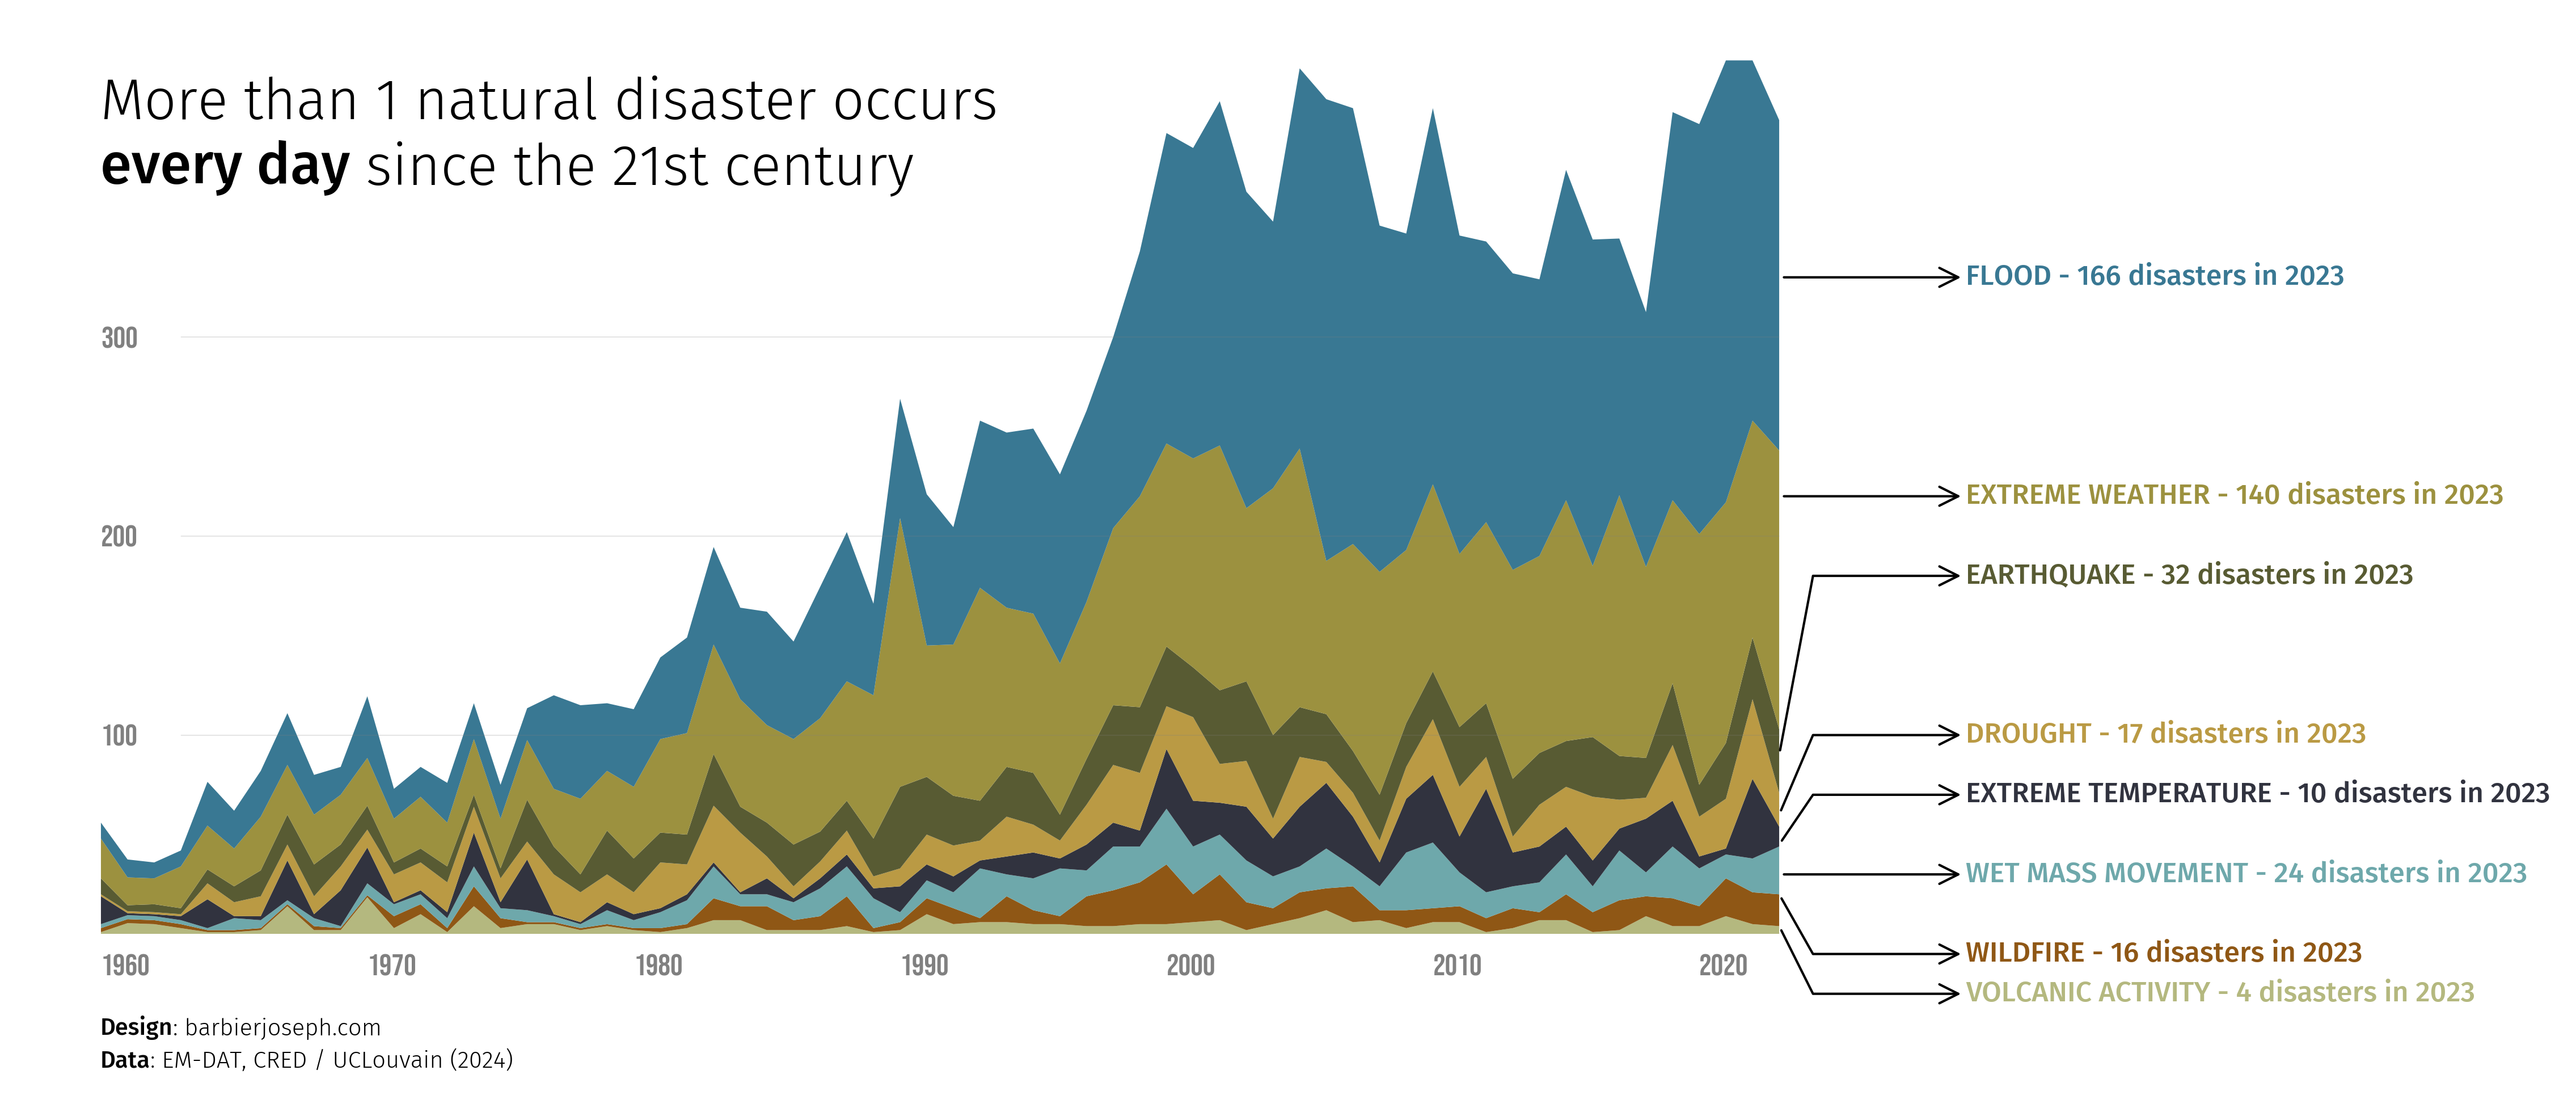

In [ ]:
# set up the font properties
font = load_google_font("Bebas Neue")
other_font = load_google_font("Fira Sans", weight="light")
other_bold_font = load_google_font("Fira Sans", weight="medium")

# initialize the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = load_palette("Dali")
color_mapping = {
    "Flood": colors[4],
    "Volcanic activity": colors[0],
    "Wildfire": colors[6],
    "Drought": colors[7],
    "Extreme temperature": colors[5],
    "Wet mass movement": colors[3],
    "Earthquake": colors[2],
    "Extreme weather": colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
    ax_text(
        x=year,
        y=-10,
        s=f"{year}",
        va="top",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )

# add label for the y-axis
for value in range(100, 400, 100):
    ax_text(
        x=1960,
        y=value,
        s=f"{value}",
        va="center",
        ha="left",
        fontsize=13,
        font=font,
        color="grey",
    )
    ax.plot([1963, 2023], [value, value], color="grey", lw=0.1)

# add title
fig_text(
    s="More than 1 natural disaster occurs\n<every day> since the 21st century",
    x=0.16,
    y=0.83,
    fontsize=24,
    ha="left",
    va="top",
    color="black",
    font=other_font,
    fig=fig,
    highlight_textprops=[{"font": other_bold_font}],
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
    s=text,
    x=0.16,
    y=0.05,
    fontsize=10,
    ha="left",
    va="top",
    color="black",
    fontproperties=other_font,
    highlight_textprops=[{"font": other_bold_font}, {"font": other_bold_font}],
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
    country = columns[::-1][i]
    val_2023 = int(df.loc[2023, country])
    ax_text(
        x=2030,
        y=y_pos[i],
        s=f"{country.upper()} - {val_2023} disasters in 2023",
        va="center",
        ha="left",
        font=other_bold_font,
        fontsize=12,
        color=colors[7 - i],
    )

# add inflexion arrows
x_axis_start = 2023
x_axis_end = 2030
radius = 10
arrow_props = {"clip_on": False, "color": "black", "fill_head": False}
ax_arrow(
    tail_position=(x_axis_start, 330), head_position=(x_axis_end, 330), **arrow_props
)
ax_arrow(
    tail_position=(x_axis_start, 220), head_position=(x_axis_end, 220), **arrow_props
)
ax_arrow(
    tail_position=(x_axis_start, 90),
    head_position=(x_axis_end, 180),
    inflection_position=(2040, 180),
    **arrow_props,
)
ax_arrow(
    tail_position=(x_axis_start, 60),
    head_position=(x_axis_end, 100),
    inflection_position=(2040, 100),
    **arrow_props,
)
ax_arrow(
    tail_position=(x_axis_start, 45),
    head_position=(x_axis_end, 70),
    inflection_position=(2040, 70),
    **arrow_props,
)
ax_arrow(
    tail_position=(x_axis_start, 30), head_position=(x_axis_end, 30), **arrow_props
)
ax_arrow(
    tail_position=(x_axis_start, 20),
    head_position=(x_axis_end, -10),
    inflection_position=(2040, -10),
    **arrow_props,
)
ax_arrow(
    tail_position=(x_axis_start, 4),
    head_position=(x_axis_end, -30),
    inflection_position=(2040, -30),
    **arrow_props,
)

plt.savefig(
    "../../static/graph/web-stacked-area-with-inflexion-arrows.png",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

## Going further

You might be interested in:

- the [stacked area chart section](/stacked-area-plot) of the gallery
- how to create [arrow with an inflexion point](/drawarrow) in a plot
- how to use [the highlight_text package](/advanced-custom-annotations-matplotlib) to add annotations to a plot
- how to create [beaufitul streamgraphs](/web-streamchart-with-matplotlib)
- this [small multiple line chart](/web-small-multiple-with-highlights)
